## K means Clustering

Machine learning algorithms are categorized into three main categories, 
* supervised
* unsupervised 
* reinforcement learning. 
                          
Up till now we have looked into supervised learning where in the given data set you have your class label or a target variable present.                                            
In unsupervised learning all you have is set of features you don't know about your target variable or a class label. Using this data set we try to identify the underlying structure in that data or we sometimes try to find the clusters in that data and we can make useful predictions out of it.

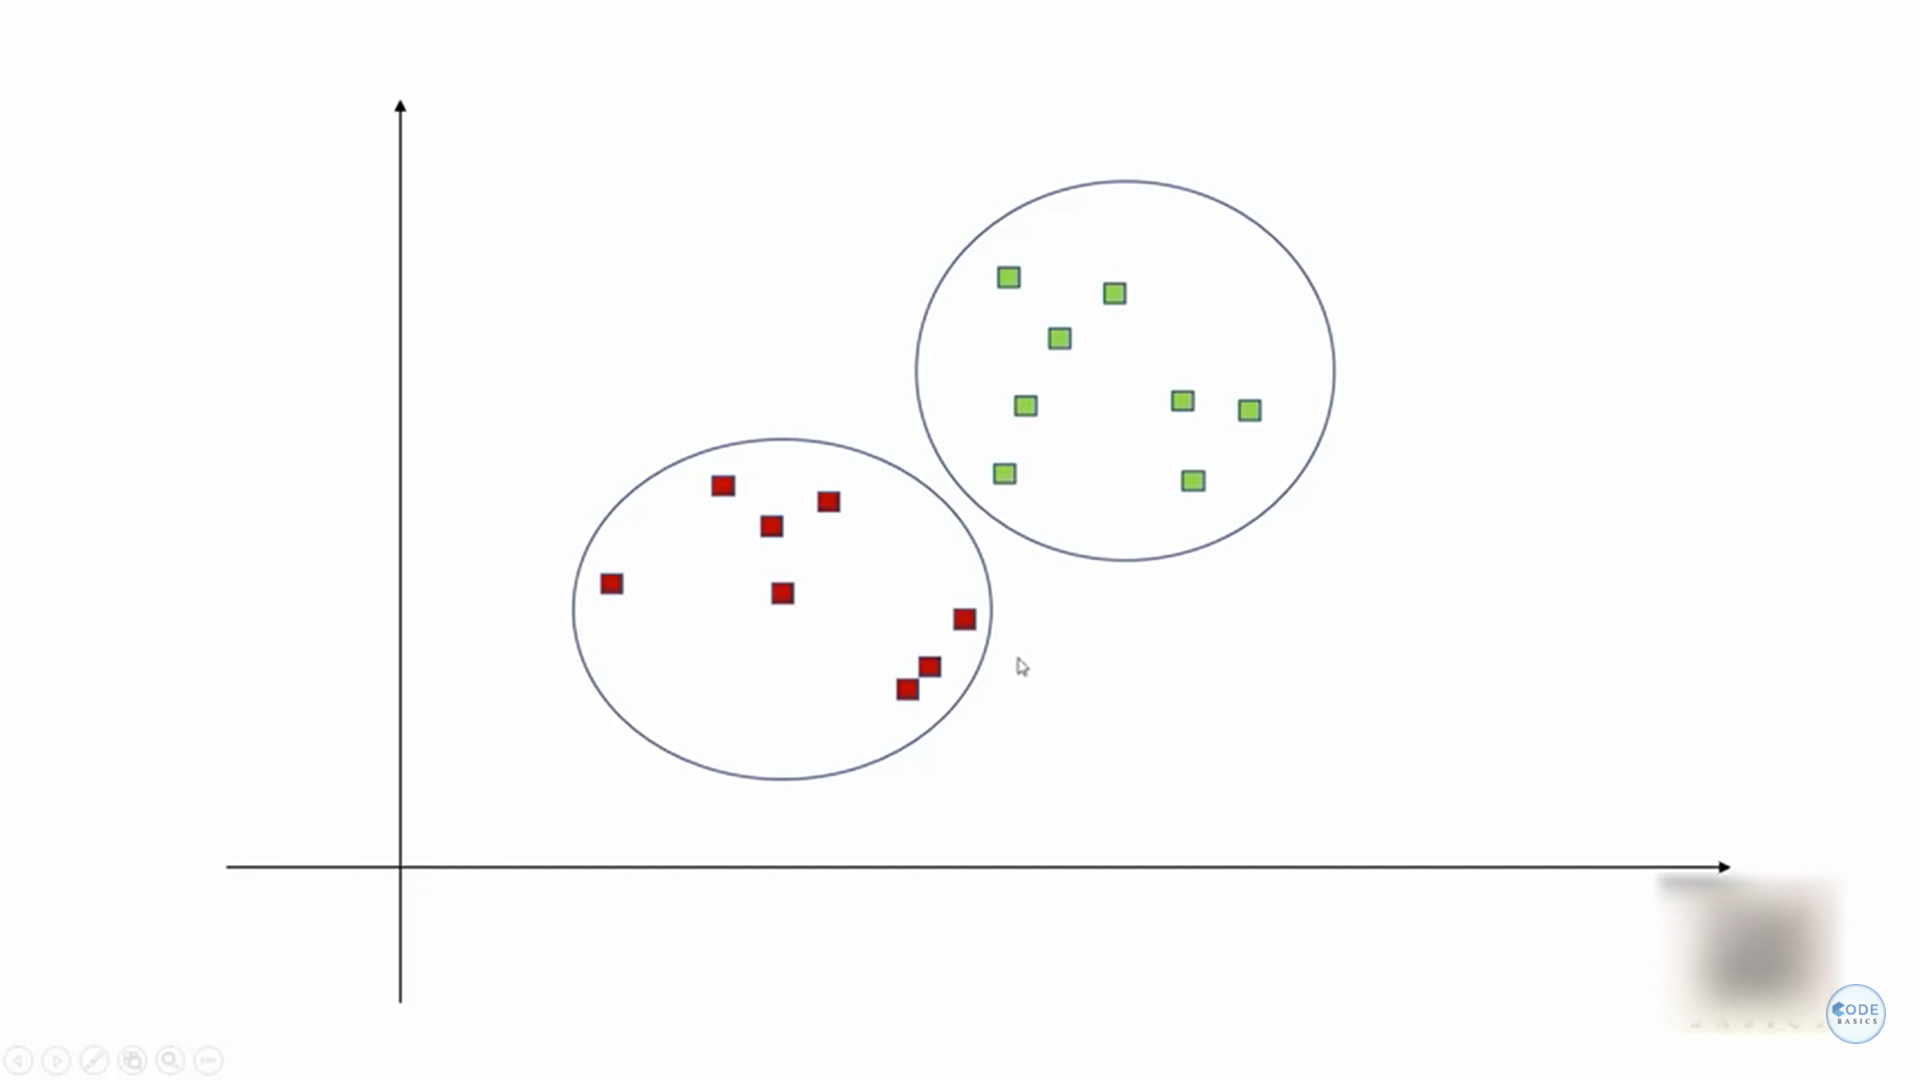

Let's say you have a data set like this where x and y axis represent the two different features and you want to identify clusters in this data set. Now when the data set is given to you you don't have any information on target variables so you don't know what you're looking for. All you're trying to do is identify some structure into it and one way of looking into this is these two clusters. Just by visual examination we can say that this data set has these two clusters and K means helps you identify these clusters. Now K in K means is a free parameter wherein before you start the algorithm you have to tell the algorithm what is the value of K that you're looking for. Here K is equal to 2. So let's say you have this data set you start with K is equal to 2 and the first step is to identify two random points which you consider as the center of those two clusters. We call them centroids as well. So you just put two random points here. If your K was let's say three then you will put three random points. And these could be placed anywhere in this 2D place doesn't matter. Next step is to identify the distance of each of these data points from these centroids. So for example this data point is more near to this centroid hence we'll say it belongs to red cluster whereas this data point is more near to green so we'll say this belongs to green cluster. The simple mathematical way to identify the distance is to draw this kind of line connecting the line between those two centroids and then draw a perpendicular line. Anything on the left hand side is red cluster on right hand side is green cluster. So there you go you already have your two imperfect clunky clusters and now we try to improve these clusters. 

#### way to find out value of K

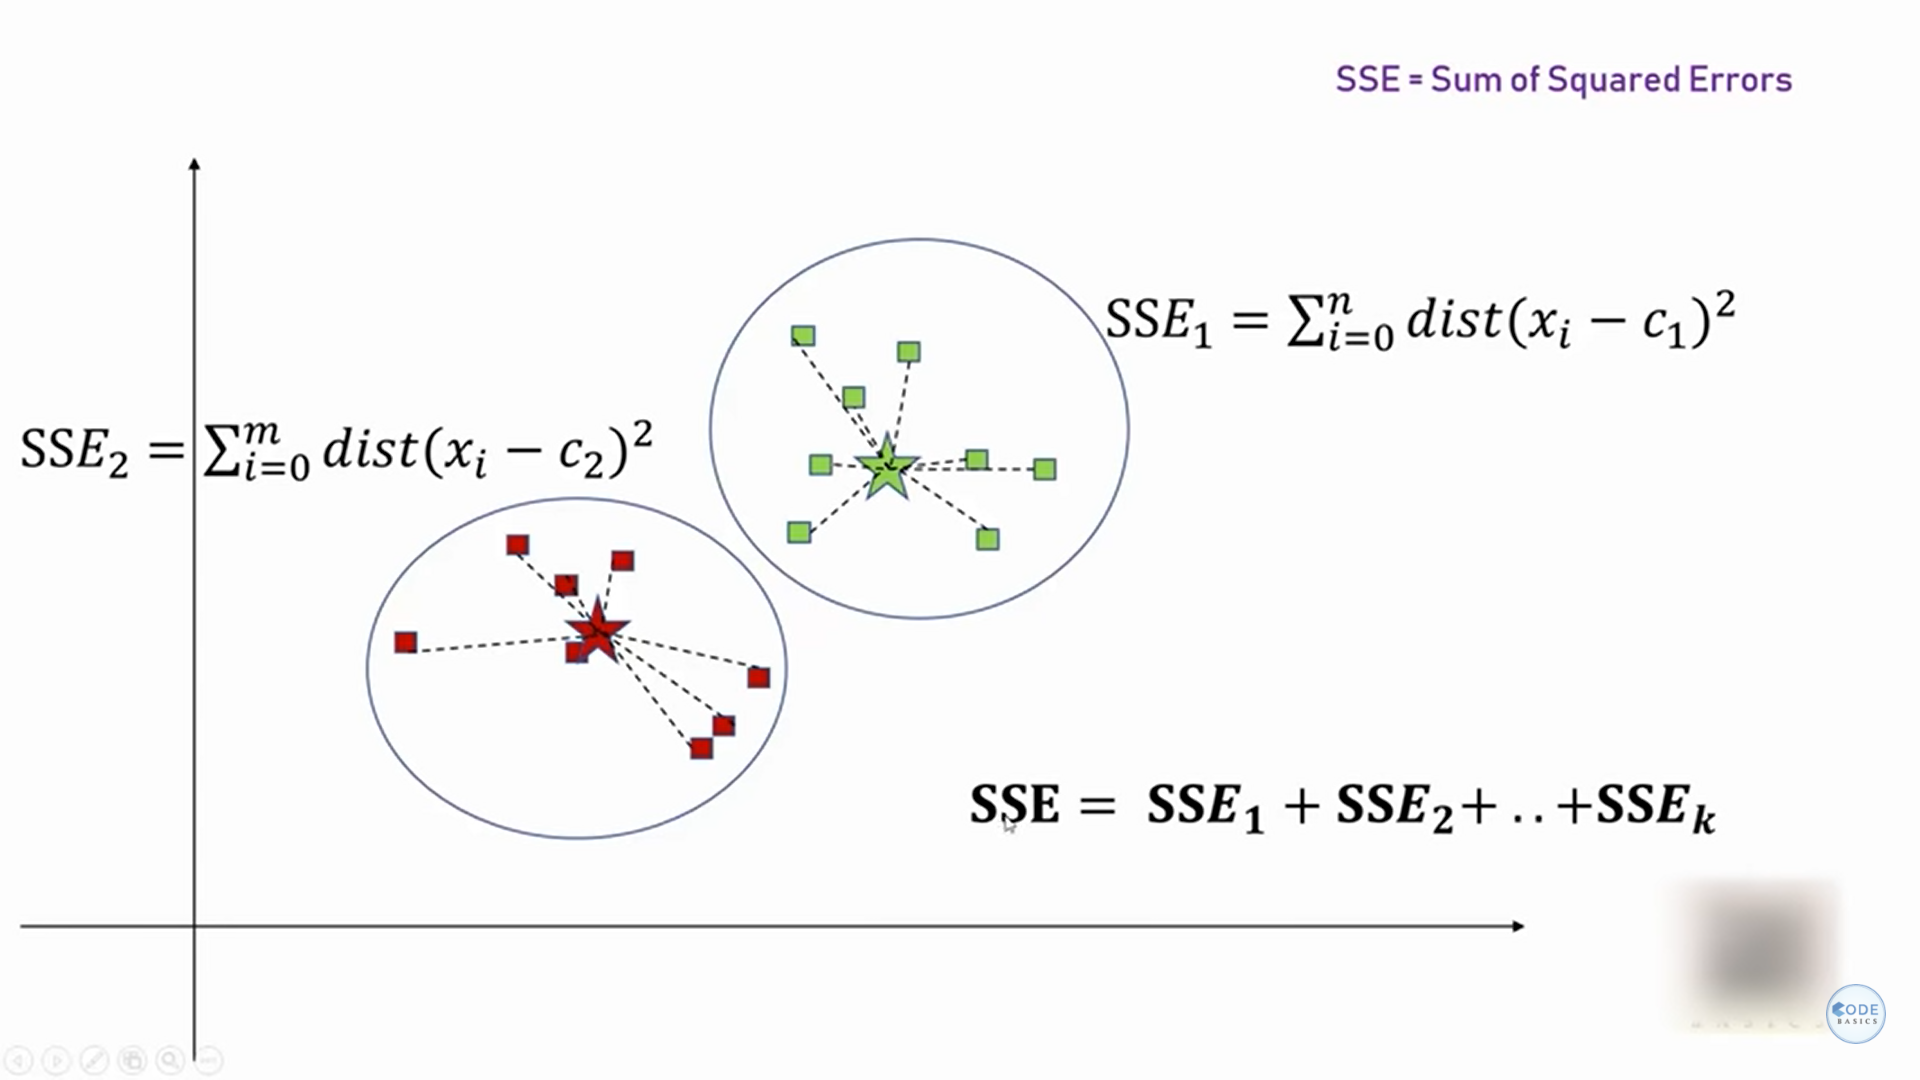

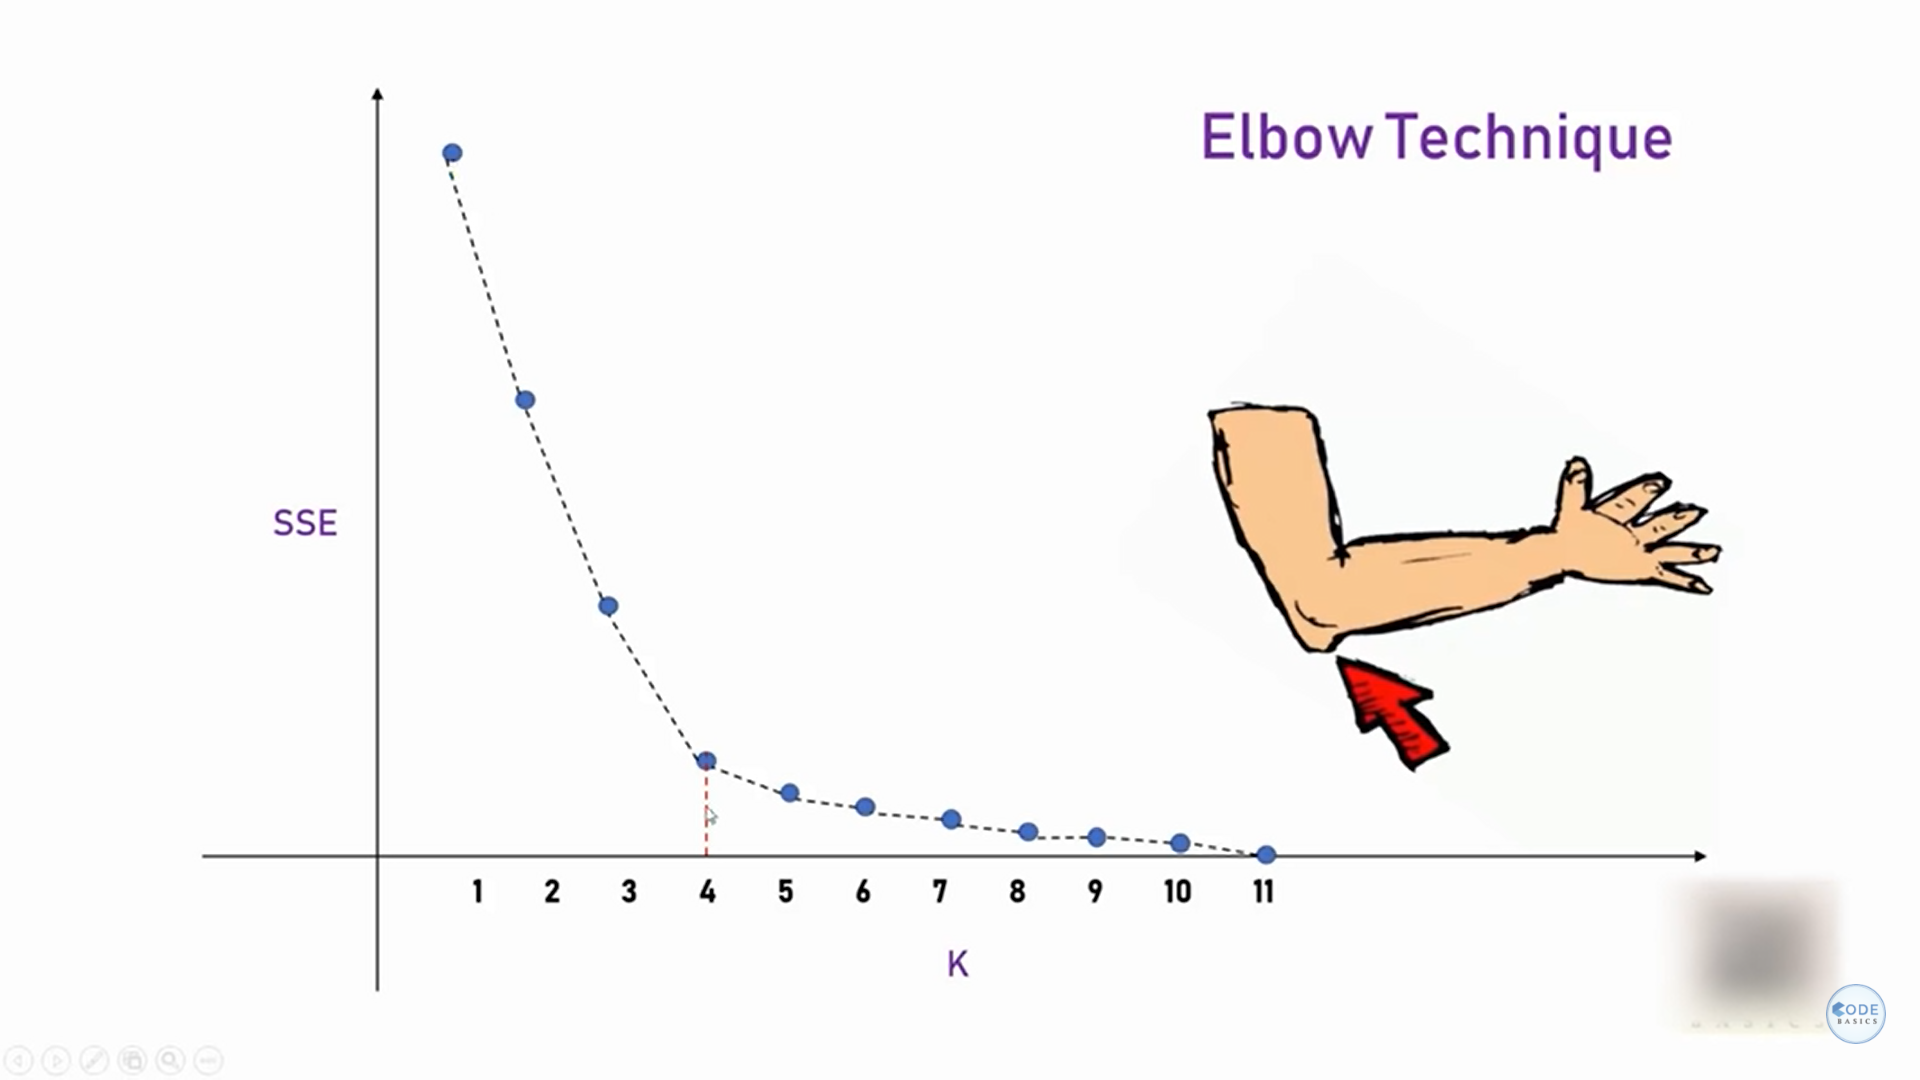

In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler #To retransform any numeric column range bw 0 and 1 
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

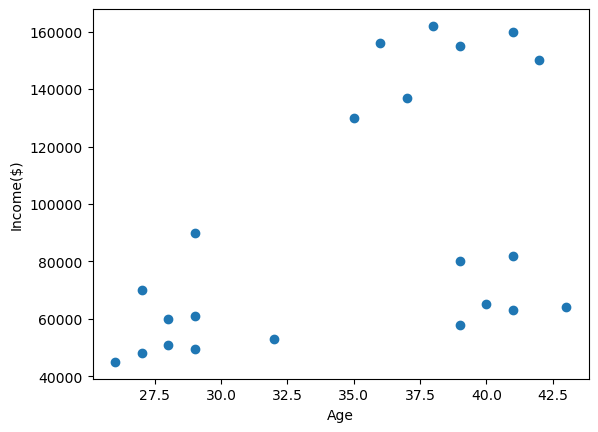

In [3]:
plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [5]:
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\PC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [6]:
df["cluter"]=y_predicted
df=df.drop("y_predicted",axis=1)

KeyError: "['y_predicted'] not found in axis"

In [ ]:
df.head()

In [ ]:
df1=df[df.cluter==0]
df2=df[df.cluter==1]
df3=df[df.cluter==2]

df1

In [ ]:
plt.scatter(df1.Age,df1["Income($)"],color="g")
plt.scatter(df2.Age,df2["Income($)"],color="r")
plt.scatter(df3.Age,df3["Income($)"],color="b")
plt.xlabel("Age")
plt.ylabel("Income")

Range of X and Y has pretty much difference, so we'll use MinMaxScaler to transform it bw range of 0 and 1

In [ ]:
scaler=MinMaxScaler() #Creating Object

In [ ]:
a=scaler.fit(df[["Income($)"]])

In [ ]:
df["Income($)"]=a.transform(df[["Income($)"]])

In [ ]:
df

In [ ]:
b=scaler.fit(df[["Age"]])

In [ ]:
df.Age=b.transform(df[["Age"]])

In [ ]:
df

In [ ]:
y_predicted=km.fit_predict(df[["Age","Income($)"]])
y_predicted

In [ ]:
df["cluster"]=y_predicted

In [ ]:
df

In [ ]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

In [ ]:
km.cluster_centers_

In [ ]:
plt.scatter(df1["Age"],df1["Income($)"])
plt.scatter(df2["Age"],df2["Income($)"])
plt.scatter(df3["Age"],df3["Income($)"])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="purple",marker="+")

### To find the value of K using SSE (sum of squared error) 

In [ ]:
# take a range of K from 1 to 9
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit_transform(df[["Age","Income($)"]])
    sse_=km.inertia_ #To find sum of squred error
    sse.append(sse_)

In [ ]:
sse

In [ ]:
#Let's plot this sse list and find elbow value
plt.plot(k_range,sse)
plt.xlabel("K")
plt.ylabel("SSE")

# Test

In [ ]:
find the clusters bw petal length and petal width of Iris dataset.